<a href="https://colab.research.google.com/github/spuderaarom/Intro-to-ML/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
housing.shape

(545, 13)

In [51]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [52]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [53]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [54]:
num_varsa = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [55]:
X_train = df_train[num_varsa].values[:, (0,1,2,3,4)]
y_train = df_train[num_varsa].values[:, 5]
m_train = len(y_train)
n_train = len(X_train)

In [56]:
X_test = df_test[num_varsa].values[:, (0,1,2,3,4)]
y_test = df_test[num_varsa].values[:, 5]
m_test = len(y_test)
n_test = len(X_test)

In [57]:
# Separate features and labels
X_test = df_test[num_varsa].values[:, (0,1,2,3,4)]
y_test = df_test[num_varsa].values[:, 5]
m_test = len(y_test)
n_test = len(X_test)

In [58]:
X_0train = np.ones((m_train,1))
X_0test = np.ones((m_test,1))

X_1train = X_train.reshape(m_train,5)
X_1test = X_test.reshape(m_test,5)

Xtrain = np.hstack((X_0train, X_1train))
Xtest = np.hstack((X_0test, X_1test))

In [59]:
theta = np.zeros(6)
m= len(housing)

In [60]:
def compute_cost_train(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [61]:
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)  # Number of training examples
    m_test = len(y_test)  # Number of testing examples
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test

In [62]:
iterations = 1500
alpha = .000000001

In [63]:
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain, Xtest, y_train, y_test, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [  1.2253371  861.91048121   4.51279359   2.57703268   3.93395411
   0.96779989]
cost_history = [2.36944282e+13 2.12466211e+13 1.90937682e+13 ... 3.38019315e+12
 3.38019314e+12 3.38019312e+12] [2.24176818e+13 2.00129484e+13 1.79036584e+13 ... 3.21892431e+12
 3.21892429e+12 3.21892428e+12]


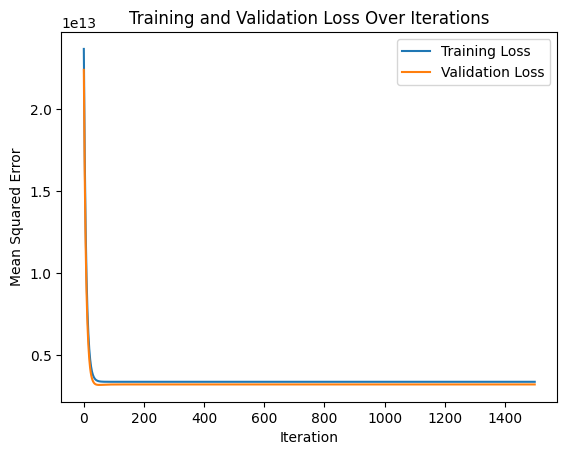

In [64]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [65]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']


In [66]:
X_trainb = df_train[num_vars].values[:, 0:11]
y_trainb = df_train[num_vars].values[:, 11]
m_trainb = len(y_trainb)
n_trainb = len(X_trainb)

In [67]:
X_testb = df_test[num_vars].values[:, 0:11]
y_testb = df_test[num_vars].values[:, 11]
m_testb = len(y_test)
n_testb = len(X_test)

In [68]:
X_0trainb = np.ones((m_trainb,1))
X_0testb = np.ones((m_testb,1))

X_1trainb = X_trainb.reshape(m_trainb,11)
X_1testb = X_testb.reshape(m_testb,11)

Xtrainb = np.hstack((X_0trainb, X_1trainb))
Xtestb = np.hstack((X_0testb, X_1testb))

In [69]:
theta1b = np.zeros(12)

In [70]:
iterations1b = 1500
alpha1b = 0.000000001

In [71]:
theta, cost_history_train, cost_history_test = gradient_descent(Xtrainb, Xtestb, y_trainb, y_testb, theta1b, alpha1b, iterations1b)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [1.22533683e+00 8.61910190e+02 4.51279273e+00 2.57703229e+00
 3.93395349e+00 1.05758155e+00 4.46888356e-01 7.00118508e-01
 2.10369703e-01 9.70769990e-01 9.67799742e-01 4.79079852e-01]
cost_history = [2.36944281e+13 2.12466209e+13 1.90937679e+13 ... 3.38019131e+12
 3.38019129e+12 3.38019127e+12] [2.24176817e+13 2.00129482e+13 1.79036582e+13 ... 3.21892202e+12
 3.21892200e+12 3.21892198e+12]


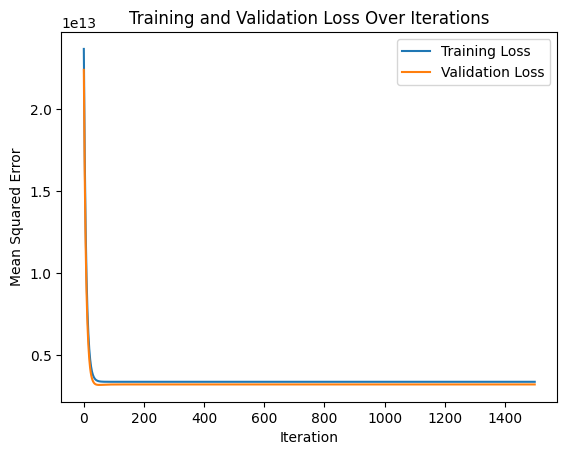

In [72]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])

In [74]:
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [75]:
y_train2a= df_train['price'].values
x_train2a = df_train[num_varsa].values[:, (0,1,2,3,4)]
m_train2a = len(y_train2a)
n_train2a = len(x_train2a)

In [76]:
y_test2a= df_test['price'].values
x_test2a = df_test[num_varsa].values[:, (0,1,2,3,4)]
m_test2a = len(y_test2a)
n_test2a = len(x_test2a)


In [77]:
X_02a = np.ones((m_train2a, 1))
X_0t2a = np.ones((m_test2a, 1))

In [78]:
X_12a = x_train2a.reshape(m_train2a, 5)
X_1t2a = x_test2a.reshape(m_test2a, 5)

x_train2a = np.hstack((X_02a, X_12a))
x_test2a = np.hstack((X_0t2a, X_1t2a))

In [79]:
theta2a = np.zeros(6)

In [80]:
iterations2a = 1500
alpha2a = 0.01

In [81]:
theta2a, cost_history_train, cost_history_test = gradient_descent(x_train2a, x_test2a, y_train2a, y_test2a, theta2a, alpha2a, iterations2a)
print('Final value of theta =', theta2a)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [4795729.22018316  729932.3572104    79334.75241901  641264.73546138
  463855.85935051  287331.20855395]
cost_history = [2.54329771e+13 2.44340072e+13 2.34785618e+13 ... 1.52206968e+12
 1.52206968e+12 1.52206968e+12] [2.41295342e+13 2.31464665e+13 2.22073654e+13 ... 1.60988456e+12
 1.60988456e+12 1.60988456e+12]


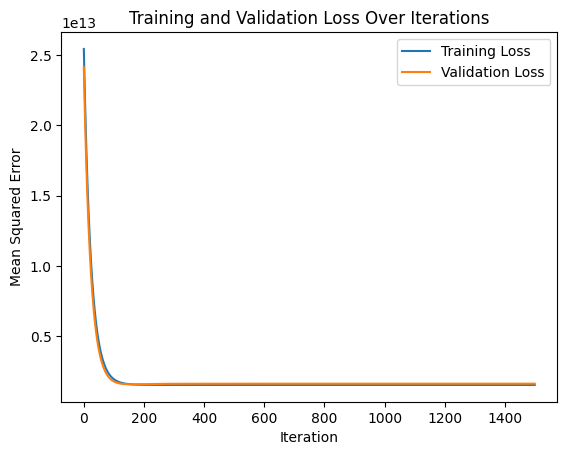

In [82]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [83]:
scaler = MinMaxScaler()#StandardScaler() #

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [84]:
X_train2b = df_train[num_vars].values[:, 0:11]
y_train2b = df_train[num_vars].values[:, 11]
m_train2b = len(y_train2b)
n_train2b = len(X_train2b)

In [85]:
X_test2b = df_test[num_vars].values[:, 0:11]
y_test2b = df_test[num_vars].values[:, 11]
m_test2b = len(y_test2b)
n_test2b = len(X_test)

In [86]:
X_0train2b = np.ones((m_train2b, 1))
X_0test2b = np.ones((m_test2b, 1))

X_1train2b = X_train2b.reshape(m_train2b, 11)
X_1test2b = X_test2b.reshape(m_test2b, 11)

Xtrain2b = np.hstack((X_0train2b, X_1train2b))
Xtest2b = np.hstack((X_0test2b, X_1test2b))

In [87]:
theta2b = np.zeros(12)
iterations2b = 1500
alpha2b = 0.1

In [88]:
theta2b, cost_history_train, cost_history_test = gradient_descent(Xtrain2b, Xtest2b, y_train2b, y_test2b, theta2b, alpha2b, iterations2b)
print('Final value of theta =', theta2b)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [0.00062157 0.30672338 0.04501606 0.29873061 0.10792256 0.05313261
 0.03360977 0.02623172 0.07781048 0.07562659 0.06725729 0.05257376]
cost_history = [0.03625022 0.02130074 0.01738271 ... 0.00860915 0.00860915 0.00860914] [0.04291103 0.02570219 0.02063971 ... 0.01187362 0.01187365 0.01187368]


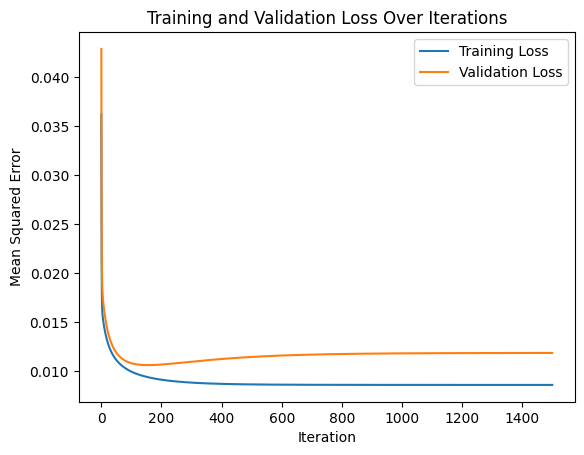

In [89]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [90]:
scaler = StandardScaler()#MinMaxScaler()#StandardScaler()#MinMaxScaler()
num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])

In [91]:
y_train3a= df_train['price'].values
x_train3a = df_train[num_varsa].values[:, (0,1,2,3,4)]
m_train3a = len(y_train3a)
n_train3a = len(x_train3a)

In [92]:
y_test3a= df_test['price'].values
x_test3a = df_test[num_varsa].values[:, (0,1,2,3,4)]
m_test3a = len(y_test3a)
n_test3a = len(x_test3a)

In [93]:
X_03a = np.ones((m_train3a, 1))
X_0t3a = np.ones((m_test3a, 1))

In [94]:
X_13a = x_train3a.reshape(m_train3a, 5)
X_1t3a = x_test3a.reshape(m_test3a, 5)

x_train3a = np.hstack((X_03a, X_13a))
x_test3a = np.hstack((X_0t3a, X_1t3a))

In [95]:
def gradient_descentS(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y_train3a)
    m_test = len(y_test3a)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors) + lambdaa * theta[:1]
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y)) + (lambdaa / (2 * m_train)) * np.sum(np.square(theta[1:]))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test

In [96]:
theta = np.zeros(6)
iterations3a = 1500
alpha3a = 0.01
lambdaa = 1

In [97]:
theta, cost_history_train, cost_history_test = gradient_descentS(x_train3a, x_test3a, y_train3a, y_test3a, theta, alpha3a, iterations3a)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [ 0.17579967  0.01035033 -0.02891624  0.01819609 -0.01567801 -0.03370917]
cost_history = [0.09185615 0.08834101 0.08504948 ... 0.04026857 0.04026857 0.04026857] [0.10283726 0.09911856 0.09564519 ... 0.04795767 0.04795767 0.04795767]


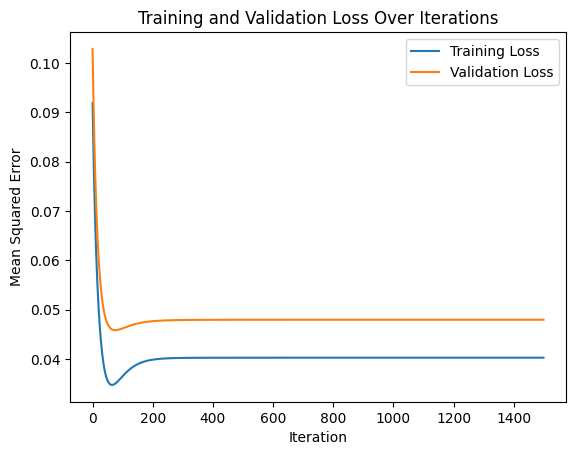

In [98]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [99]:
scaler = StandardScaler()#MinMaxScaler()#StandardScaler()#MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [100]:
X_train3b = df_train[num_vars].values[:, 0:11]
y_train3b = df_train[num_vars].values[:, 11]

m_train3b = len(y_train3b)
n_train3b = len(X_train3b)


X_test3b = df_test[num_vars].values[:, 0:11]
y_test3b = df_test[num_vars].values[:, 11]

m_test3b = len(y_test3b)
n_test3b = len(X_test)

In [101]:
X_0train3b = np.ones((m_train3b, 1))
X_0test3b = np.ones((m_test3b, 1))

In [102]:
X_1train3b = X_train3b.reshape(m_train3b, 11)
X_1test3b = X_test3b.reshape(m_test3b, 11)

Xtrain3b = np.hstack((X_0train3b, X_1train3b))
Xtest3b = np.hstack((X_0test2b, X_1test3b))

In [103]:
theta3b = np.zeros(12)
iterations3b = 1500
alpha3b = 0.01
lambdaa = 0.1

In [104]:
theta, cost_history_train, cost_history_test = gradient_descentS(Xtrain3b, Xtest3b, y_train3b, y_test3b, theta3b, alpha3b, iterations3b)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [1.52646305e-16 2.85688070e-01 3.89913408e-02 3.10167408e-01
 1.97101008e-01 1.12753832e-01 7.83067164e-02 7.79667647e-02
 1.09891744e-01 2.14416488e-01 1.19295508e-01 1.37110704e-01]
cost_history = [0.94268458 0.89041161 0.84273354 ... 0.33019267 0.33019267 0.33019267] [0.93751286 0.88066438 0.82894875 ... 0.33242153 0.33242153 0.33242153]


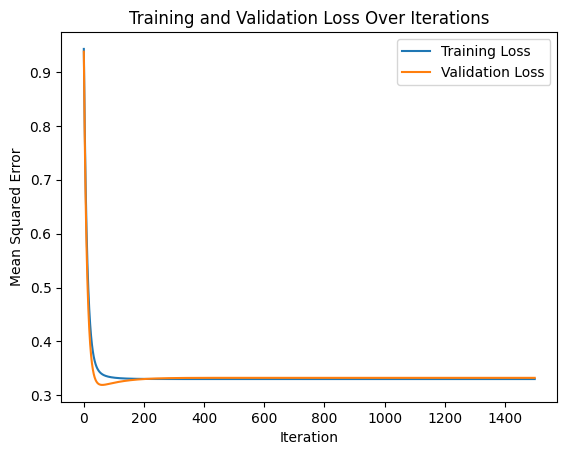

In [105]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()